# Ground state (edge) insert worm

In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps

### Simulation parameters

In [2]:
# Simulation parameters
N = 4
L = N   # half-filling
t = 0
U = 1
mu = -0.1
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

### Create a worldline configuration 

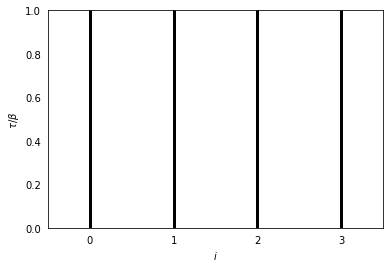

In [3]:
# Create a worldline configuration
alpha = [2,2,2,2]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Insert a worm or antiworm from $\tau=0$

p_type =  0.5
p_wormend =  1
R =  5.656854249492381


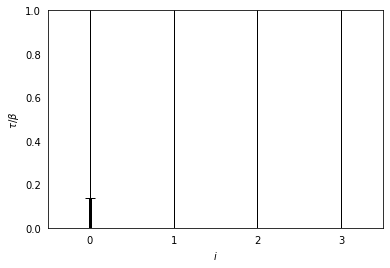

head_loc:  [0, 1]
tail_loc:  []
tau =  0.13559909808845194


In [7]:
# Create a worldline configuration
alpha = [1,1,1,1]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []

pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta)

pimc.view_worldlines(data_struct,beta,figure_name=None)
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)

#[time,N,(src,dest)]
if head_loc != [] and tail_loc == []: # worm
    tau = data_struct[head_loc[0]][head_loc[1]][0]
else: # antiworm
    tau = data_struct[tail_loc[0]][tail_loc[1]][0]

print("tau = ", tau)

In [5]:
# Do insert many times on the above configuration
mc_steps = int(1E+05)
worm_lengths = np.zeros(mc_steps)  # create array to save worm lengths
 
for m in range(mc_steps):
    
    pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta)

    #[time,N,(src,dest)]
    if head_loc != [] and tail_loc == []: # worm
        tau = data_struct[head_loc[0]][head_loc[1]][0]
    else: # antiworm
        tau = data_struct[tail_loc[0]][tail_loc[1]][0]
        
    worm_lengths[m] = tau
        
    if m == mc_steps - 1: break
    
    #pimc.view_worldlines(data_struct,beta,figure_name=None)
    
    # Create a worldline configuration
    alpha = [2,2,2,2]
    data_struct = pimc.create_data_struct(alpha)
    head_loc = []
    tail_loc = []

In [6]:
# Histogram of worm lengths
b = beta
loc = 0

# Calculate change in diagonal energy after/before worm end (need this for scale)
if head_loc != [] and tail_loc == []: # worm
    x = head_loc[0]
    k = head_loc[1]
    n_f = data_struct[x][k][1]       # particles after head
    n_o = data_struct[x][k-1][1]     # particles before head
    dV = (U/2)*(n_o*(n_o-1)-n_f*(n_f-1)) - mu*(n_o-n_f)
else: # antiworm
    x = tail_loc[0]
    k = tail_loc[1]
    n_f = data_struct[x][k][1]       # particles after tail
    n_o = data_struct[x][k-1][1]     # particles before tail
    dV = (U/2)*(n_f*(n_f-1)-n_o*(n_o-1)) - mu*(n_f-n_o)

scale = 1/abs(dV)
print("scale: ",scale)
# Generate truncated exponential distribution of worm lengths
tau_w = np.linspace(0,beta,int(1E+02+1))                    # worm lengths
tau_w = (tau_w[1:]+tau_w[0:-1])/2    
#[time,N,(src,dest)]
if head_loc != [] and tail_loc == []: # worm
    pdf = truncexpon.pdf(tau_w,b=b/scale,loc=loc,scale=scale)
else: # antiworm
    pdf = truncexpon.pdf(-tau_w+b,b=b/scale,loc=loc,scale=scale)

# Rescale & normalize the truncated exponential pdf
#if tau_t < tau_h:
#    pdf *= (beta-tau_w)     # worm
#else:
#    pdf *= (tau_w)           # antiworm?
pdf /= simps(pdf,tau_w)

#pdf_1 = pdf*(beta-tau_w)
#pdf_1 /= simps(pdf_1,tau_w)
#pdf_2 = pdf*(tau_w)
#pdf_2 /= simps(pdf_2,tau_w)
#pdf_3 = ( pdf_1  + pdf_2 ) / simps(pdf_1+pdf_2,tau_w)

# Sampled worm lengths
n, bins = np.histogram(worm_lengths, bins=tau_w, density=1) # for histogram

scale:  0.9090909090909091


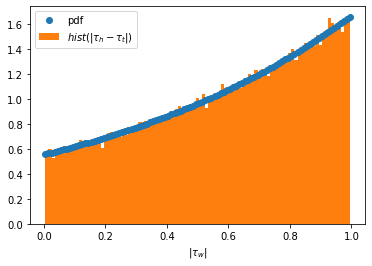

In [7]:
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(tau_w,pdf,label='pdf',linestyle='None',marker='o')
ax.hist(worm_lengths,bins=bins,density=True,histtype='stepfilled',alpha=1,label=r'$hist(\vert\tau_h-\tau_t\vert)$')
ax.set_xlabel(r"$\vert \tau_w \vert $") ;
#ax.set_yscale("log");
plt.legend() ;
#plt.savefig("antiworm_%d_%d_%.4f_%.4f_%.4f_%d.pdf"%(L,N,U,mu,t,mc_steps))

### Just a (slightly) more complex configuration

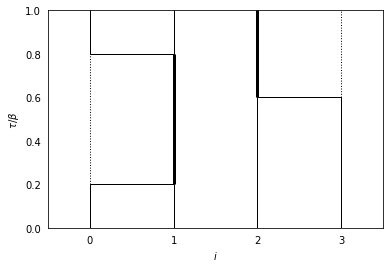

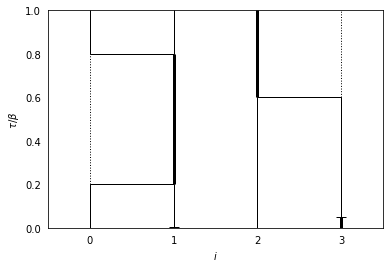

head_loc:  [3, 1]
tail_loc:  [1, 1]


In [13]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)
pimc.view_worldlines(data_struct,beta,figure_name=None)

head_loc = []
tail_loc = []

pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta)
pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta)

pimc.view_worldlines(data_struct,beta,figure_name=None)
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)

## Insert worm from $\tau=\beta$

In [5]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps

In [6]:
# Simulation parameters
N = 4
L = N   # half-filling
t = 0
U = 1
mu = -0.1
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

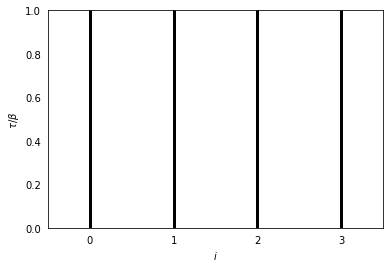

In [7]:
# Create a worldline configuration
alpha = [2,2,2,2]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
pimc.view_worldlines(data_struct,beta,figure_name=None)

p_type =  0.5
p_wormend =  1
R =  6.928203230275509


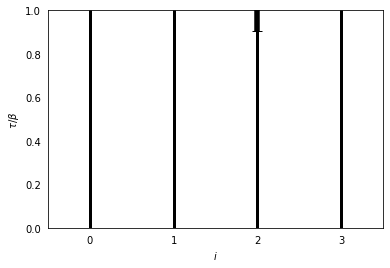

head_loc:  []
tail_loc:  [2, 1]
tau =  0.904268797782879


In [9]:
# Create a worldline configuration
alpha = [2,2,2,2]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []

pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta)

pimc.view_worldlines(data_struct,beta,figure_name=None)
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)

#[time,N,(src,dest)]
if head_loc != [] and tail_loc == []: # worm
    tau = data_struct[head_loc[0]][head_loc[1]][0]
else: # antiworm
    tau = data_struct[tail_loc[0]][tail_loc[1]][0]

print("tau = ", tau)

In [18]:
# Do insert many times on the above configuration
mc_steps = int(1E+05)
#mc_steps = 5
worm_lengths = np.zeros(mc_steps)  # create array to save worm lengths
 
for m in range(mc_steps):
    
    pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta)

    #[time,N,(src,dest)]
    if head_loc != [] and tail_loc == []: # worm
        tau = data_struct[head_loc[0]][head_loc[1]][0]
    else: # antiworm
        tau = data_struct[tail_loc[0]][tail_loc[1]][0]
        
    worm_lengths[m] = beta - tau
        
    #pimc.view_worldlines(data_struct,beta,figure_name=None)

    if m == mc_steps - 1: break
        
    # Create a worldline configuration
    alpha = [2,2,2,2]
    data_struct = pimc.create_data_struct(alpha)
    head_loc = []
    tail_loc = []

In [19]:
# Histogram of worm lengths
b = beta
loc = 0

# Calculate change in diagonal energy after/before worm end (need this for scale)
if head_loc != [] and tail_loc == []: # antiworm
    x = head_loc[0]
    k = head_loc[1]
    n_f = data_struct[x][k][1]       # particles after head
    n_o = data_struct[x][k-1][1]     # particles before head
    dV = (U/2)*(n_o*(n_o-1)-n_f*(n_f-1)) - mu*(n_o-n_f)
else: # worm
    x = tail_loc[0]
    k = tail_loc[1]
    n_f = data_struct[x][k][1]       # particles after tail
    n_o = data_struct[x][k-1][1]     # particles before tail
    dV = (U/2)*(n_f*(n_f-1)-n_o*(n_o-1)) - mu*(n_f-n_o)

scale = 1/abs(dV)
print("scale: ",scale)
# Generate truncated exponential distribution of worm lengths
tau_w = np.linspace(0,beta,int(1E+02+1))                    # worm lengths
tau_w = (tau_w[1:]+tau_w[0:-1])/2    
#[time,N,(src,dest)]
if head_loc == [] and tail_loc != []: # worm
    print("Hi")
    pdf = truncexpon.pdf(tau_w,b=b/scale,loc=loc,scale=scale)
else: # antiworm
    pdf = truncexpon.pdf(-tau_w+b,b=b/scale,loc=loc,scale=scale)

# Rescale & normalize the truncated exponential pdf
#if tau_t < tau_h:
#    pdf *= (beta-tau_w)     # worm
#else:
#    pdf *= (tau_w)           # antiworm?
pdf /= simps(pdf,tau_w)

#pdf_1 = pdf*(beta-tau_w)
#pdf_1 /= simps(pdf_1,tau_w)
#pdf_2 = pdf*(tau_w)
#pdf_2 /= simps(pdf_2,tau_w)
#pdf_3 = ( pdf_1  + pdf_2 ) / simps(pdf_1+pdf_2,tau_w)

# Sampled worm lengths
n, bins = np.histogram(worm_lengths, bins=tau_w, density=1) # for histogram

scale:  0.47619047619047616
Hi


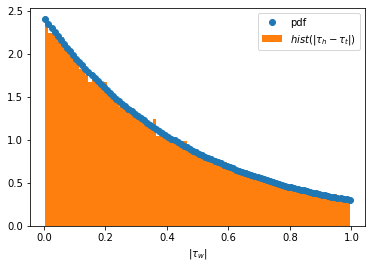

In [20]:
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(tau_w,pdf,label='pdf',linestyle='None',marker='o')
ax.hist(worm_lengths,bins=bins,density=True,histtype='stepfilled',alpha=1,label=r'$hist(\vert\tau_h-\tau_t\vert)$')
ax.set_xlabel(r"$\vert \tau_w \vert $") ;
#ax.set_yscale("log");
plt.legend() ;
#plt.savefig("antiworm_%d_%d_%.4f_%.4f_%.4f_%d.pdf"%(L,N,U,mu,t,mc_steps))

### Slightly more complex configuration

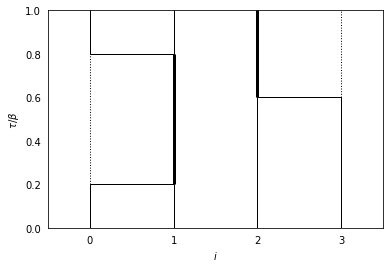

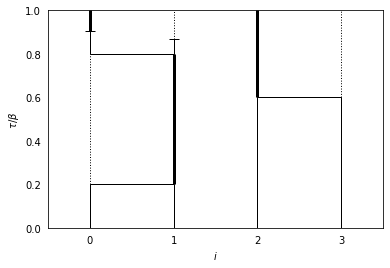

head_loc:  [1, 3]
tail_loc:  [0, 3]


In [7]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)
pimc.view_worldlines(data_struct,beta,figure_name=None)

head_loc = []
tail_loc = []

pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta)
pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta)

pimc.view_worldlines(data_struct,beta,figure_name=None)
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)

## Insert a worm end from $\tau=0$ and the other from $\tau=\beta$

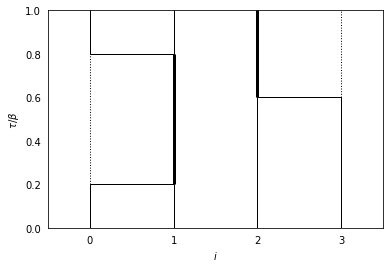

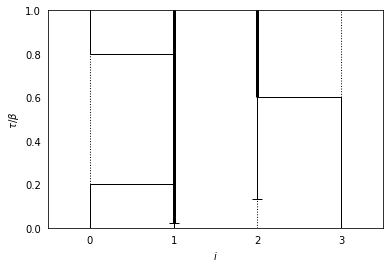

head_loc:  []
tail_loc:  [2, 1, 1, 3]


In [14]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)
pimc.view_worldlines(data_struct,beta,figure_name=None)

head_loc = []
tail_loc = []

pimc.insert_gsworm_zero(data_struct,beta,head_loc,tail_loc,U,mu,eta)
pimc.insert_gsworm_beta(data_struct,beta,head_loc,tail_loc,U,mu,eta)

pimc.view_worldlines(data_struct,beta,figure_name=None)
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)